In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

Mounted at /content/drive


In [2]:
!pip install transformers

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 4.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 20.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61 kB 608 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 60.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 84.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [4]:
!pip install transformers pysentimiento

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 170 kB 5.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 298 kB 56.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 243 kB 87.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 72.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132 kB 88.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 160 kB 77.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 271 kB 89.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 192 kB 70.5 MB/s 
  Created wheel for emoji

In [5]:
from transformers import pipeline, set_seed, AutoTokenizer, AutoModelForSequenceClassification
# from pysentimiento import SentimentAnalyzer,EmotionAnalyzer
from pysentimiento import create_analyzer
import requests
from bs4 import BeautifulSoup
import bleach
import re
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.manifold import TSNE

In [6]:
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn import model_selection, metrics 
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier 

from sklearn import linear_model

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


# Pre-precessing
1. drop duplicates, drop N/A, filter non-English
2. Show distribution of data

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/data/Olympic2020_tweets.csv", sep=',',encoding='UTF-8')

result = df1["id"].unique()
print(len(df1["id"]))

print("ÂéªÈáç‰πãÂêéÁöÑ‰∏™Êï∞", len(result))

#drop duplicates ÂéªÈáç
data=df1.drop_duplicates(subset=['id'],keep='first',inplace=False)
data=df1.drop_duplicates(subset=['text'],keep='first',inplace=False)
#only original tweets Á≠õÈÄâis retweetÊòØfalseÁöÑÂéüÂàõÂæÆÂçö
data = data[data['is_retweet']==False] #159470 rows √ó 16 columns

# drop na ÂéªÁ©∫
data = data[['id','user_name','user_followers','user_verified','date','text','retweets','favorites','is_retweet']]
data = data.dropna() #159074 rows √ó 9 columns
# data#159074 rows √ó 9 columns
print("ÂéªÁ©∫‰πãÂêéÁöÑ‰∏™Êï∞", data.shape)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


297011
ÂéªÈáç‰πãÂêéÁöÑ‰∏™Êï∞ 159493
ÂéªÁ©∫‰πãÂêéÁöÑ‰∏™Êï∞ (159074, 9)


In [ ]:
#expand dataset
df2 = pd.read_csv("/content/drive/MyDrive/data/data234_1.csv", sep=',',encoding='UTF-8')
df3 = pd.read_csv("/content/drive/MyDrive/data/data2560_1.csv", sep=',',encoding='UTF-8')

df = pd.concat([df1,df2,df3])

#drop duplicates ÂéªÈáç
data_dd=df.drop_duplicates(subset=['id'],keep='first',inplace=False)
data=data_dd.drop_duplicates(subset=['text'],keep='first',inplace=False)

#only original tweets Á≠õÈÄâis retweetÊòØfalseÁöÑÂéüÂàõÂæÆÂçö
data = data[data['is_retweet']==False] #159470 rows √ó 16 columns

# drop na ÂéªÁ©∫
data = data[['id','user_name','user_followers','user_verified','date','text','retweets','favorites','is_retweet']]
data = data.dropna()

print(data.shape) # 161826 rows √ó 9 columns

#ËæìÂá∫ÂΩìÂâçÊï∞ÊçÆÂà∞csv
# final_data = data.to_csv("/content/drive/MyDrive/data/FinalData.csv")

(161826, 9)


In [ ]:
#only EnglishÔºàËøáÊª§ÊéâÂÖ∂‰ªñËØ≠Ë®Ä Âà†Èô§‰∏çÊòØËã±ÊñáÁöÑÔºâ
nltk.download('words')
words = set(nltk.corpus.words.words())
# for i in data
text = data['text'].tolist()
# print(len(text))
# print("xxxxxxxxxxxxxxxxx")
# en_text
en_text = []
for i in text:
  english = " ".join(w for w in nltk.wordpunct_tokenize(i) \
             if w.lower() in words or not w.isalpha())
  en_text.append(english)
len(en_text)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


161826

In [ ]:
#transfer non-english text list to Dataframe ÂÜçÊääÂéªÊéâÈùûËã±ÊñáÊñáÂ≠ó‰πãÂêéÁöÑtextËΩ¨ÂåñÊàêdf
data['text']=pd.DataFrame(data=en_text)
data = data.dropna()

data = data[data['favorites']>1]
len(data) #56530 rows √ó 9 columns ÊúÄÁªàÁöÑdataÊï∞ÊçÆ

56530

## Distrbution of data

[ 4075 11865 17697 13131  6789  2603   370]


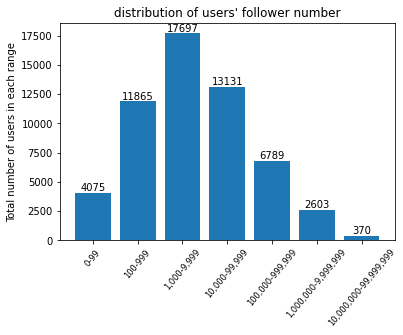

12928


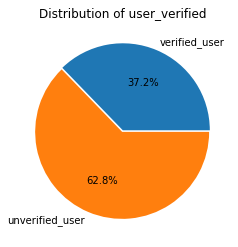

ÊúÄÂ§ßÁöÑËΩ¨ÂèëÈáèÔºö 26164
retweet num is 0: 24709


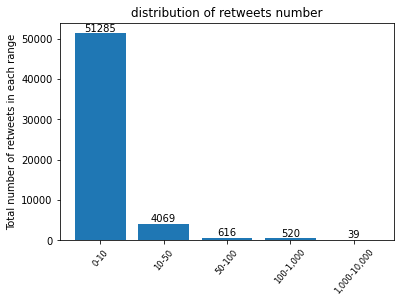

ÊúÄÂ§ßÁöÑÁÇπËµûÈáèÔºö 106130
favorites num is 0: 0


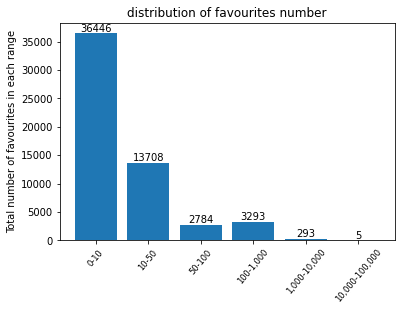

In [ ]:
# distribution of user_followers
followersnum = data["user_followers"]
followersnum = data["user_followers"].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
followersnum = np.array(followersnum)
fol_less100 = sum(followersnum<=100)#Â∞è‰∫é100ÁöÑÊúâ3‰∏áÂ§ö

# print(sorted(followersnum,reverse=False))#ÊéíÂ∫è
# print(sum(followersnum==0))#ËÆ°ÁÆó‰∏Ä‰∏™ÂÄºÁöÑ‰∏™Êï∞
fol_0_100 = ((0 <= followersnum) & (followersnum < 100)).sum()#0-100---30707
fol_100_1000 =((100 <= followersnum) & (followersnum < 1000)).sum() #100-1000 58717
fol_1000_1w = ((1000 <= followersnum) & (followersnum < 10000)).sum()#1000-1w 41424
fol_1w_10w = ((10000 <= followersnum) & (followersnum < 100000)).sum()#1w-10w 16967
fol_10w_100w = ((100000 <= followersnum) & (followersnum < 1000000)).sum()#10w-100w 7673
fol_100w_1000w = ((1000000 <= followersnum) & (followersnum < 10000000)).sum()#100w-1000w 2586
fol_1000w_1y = ((10000000 <= followersnum) & (followersnum < 100000000)).sum()#1000w-1y 355

x = range(7)
y = np.array([fol_0_100, fol_100_1000, fol_1000_1w, fol_1w_10w, fol_10w_100w, fol_100w_1000w, fol_1000w_1y])
print(y)
x_label = ["0-99","100-999","1,000-9,999","10,000-99,999","100,000-999,999","1,000,000-9,999,999","10,000,000-99,999,999"]
plt.xticks(x,x_label,size="small",rotation=50)


plt.ylabel("Total number of users in each range")
for a,b in zip(x,y):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of users' follower number")
plt.bar(x,y)
plt.show()

# distribution of user_verified
verified = data["user_verified"]
verified_true = data[data["user_verified"]==True]
verified_false = data[data["user_verified"]==False]
verified_true_num = verified_true.shape[0]
verified_false_num = verified_false.shape[0]
print(verified_true_num)
label = ["verified_user","unverified_user"]
explode=[0.01,0.01]#ËÆæÂÆöÂêÑÈ°πË∑ùÁ¶ªÂúÜÂøÉn‰∏™ÂçäÂæÑ
values = [verified_true_num,verified_false_num]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')
plt.title("Distribution of user_verified")
plt.show()

# distribution of retweets
retweetsnum = data['retweets'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
retweetsnum = np.array(retweetsnum)
print("ÊúÄÂ§ßÁöÑËΩ¨ÂèëÈáèÔºö",retweetsnum.max())
print("retweet num is 0:",sum(retweetsnum==0))
ret_0_10 = ((0 <= retweetsnum) & (retweetsnum < 10)).sum()#0-10
ret_10_50 =((10 <= retweetsnum) & (retweetsnum < 50)).sum() #10-50
ret_50_100 = ((50 <= retweetsnum) & (retweetsnum < 100)).sum()#50-100 
ret_100_1000 = ((100 <= retweetsnum) & (retweetsnum < 1000)).sum()#100-1000
ret_1000_1w = ((1000 <= retweetsnum) & (retweetsnum < 10000)).sum()#1000-1w

x = range(5)
y = np.array([ret_0_10, ret_10_50, ret_50_100, ret_100_1000, ret_1000_1w])

x_label = ["0-10","10-50","50-100","100-1,000","1,000-10,000"]
plt.xticks(x,x_label,size="small",rotation=50)


plt.ylabel("Total number of retweets in each range")
for a,b in zip(x,y):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of retweets number")
plt.bar(x,y)
plt.show()

# distribution of favourites
likesnum = data['favorites'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
likesnum = np.array(likesnum)
print("ÊúÄÂ§ßÁöÑÁÇπËµûÈáèÔºö",likesnum.max())
print("favorites num is 0:",sum(likesnum==0))
like_0_10 = ((0 <= likesnum) & (likesnum < 10)).sum()#0-10
like_10_50 =((10 <= likesnum) & (likesnum < 50)).sum() #10-50
like_50_100 = ((50 <= likesnum) & (likesnum < 100)).sum()#50-100 41424
like_100_1000 = ((100 <= likesnum) & (likesnum < 1000)).sum()#100-1000 16967
like_1000_1w = ((1000 <= likesnum) & (likesnum < 10000)).sum()#1000-1w 7673
like_1w_10w = ((10000 <= likesnum) & (likesnum < 100000)).sum()#1000-1w 7673


x = range(6)
y = np.array([like_0_10, like_10_50, like_50_100, like_100_1000, like_1000_1w, like_1w_10w])

x_label = ["0-10","10-50","50-100","100-1,000","1,000-10,000","10,000-100,000"]
plt.xticks(x,x_label,size="small",rotation=50)


plt.ylabel("Total number of favourites in each range")
for a,b in zip(x,y):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of favourites number")
plt.bar(x,y)
plt.show()

# Set a threshold for labels

In [ ]:
#linear model to calculate popular value of each tweet

# ground truth give a label to each tweet ÁªôÊØè‰∏ÄÊù°tweetË¥¥Ê†áÁ≠æ
#Áé∞Âú®ÊääÁÇπËµûÊï∞Â§ß‰∫é1000ÁöÑ‰ª•ÂèäËΩ¨ÂèëÊï∞Â§ß‰∫é800ÁöÑÂà®Èô§ÔºåÂõ†‰∏∫ÂèØ‰ª•ËÇØÂÆö‰ªñ‰ª¨Êó∂ÂÄôÂèóÊ¨¢ËøéÁöÑ
data_exceptlarge = data[(data['favorites']<500) & (data['retweets']<300)]
print("Èô§ÂéªÁÇπËµûÊï∞Â§ß‰∫é500Ôºå‰∏îËΩ¨ÂèëÊï∞Â§ß‰∫é300ÁöÑÂâ©‰∏ãÁöÑÊï∞Ôºö", len(data_exceptlarge))#55793
likesnum = data_exceptlarge['favorites'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
likesnum = np.array(likesnum)
likenum_ave = likesnum.mean()

retweetsnum = data_exceptlarge['retweets'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
retweetsnum = np.array(retweetsnum)
retweet_ave = retweetsnum.mean()

w1_f = likenum_ave/(likenum_ave + retweet_ave)#0.8485290095162455
w2_r = retweet_ave/(likenum_ave + retweet_ave)#0.15147099048375443
#popularity = w1*f+w2*r
data_exceptlarge['pop_value'] = w1_f*(data_exceptlarge['favorites'])+w2_r*(data_exceptlarge['retweets'])
print("popularityÁöÑÊúÄÂ§ßÂÄºÔºö",data_exceptlarge['pop_value'].max())

pop_value_array = np.array(data_exceptlarge['pop_value'])
#ËøôÈáåÂæóÂà∞‰∫ÜpopularityÁöÑÂÄºÁî®‰∫éËÅöÁ±ªÔºÅÔºÅ
pop_value_2d = pop_value_array.reshape(-1,1) #ÂèòÊàê‰∫Ü2d‰ΩÜÊòØÊúâ‰∏Ä‰∏™Áª¥Â∫¶ÊòØÁ©∫ÁöÑ

Èô§ÂéªÁÇπËµûÊï∞Â§ß‰∫é500Ôºå‰∏îËΩ¨ÂèëÊï∞Â§ß‰∫é300ÁöÑÂâ©‰∏ãÁöÑÊï∞Ôºö 55793
popularityÁöÑÊúÄÂ§ßÂÄºÔºö 455.674845161673


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Kmeans for clustering

kmeans‰∏≠unpopluarÁöÑ‰∏™Êï∞Ôºö 53579
‰∏§‰∏™‰∏≠ÂøÉÁÇπÊòØÔºö [[ 11.55071059]
 [210.99797673]]
ÈòàÂÄºÊòØÔºö 111.27434365815994
ÂΩìÂâçÁî®Âà∞ÁöÑÊï∞ÊçÆÈõÜÁöÑshapeÔºö (56530, 11)
popularÁöÑ‰∏™Êï∞Ôºö id                2951
user_name         2951
user_followers    2951
user_verified     2951
date              2951
text              2951
retweets          2951
favorites         2951
is_retweet        2951
pop_value         2214
pop_label         2951
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

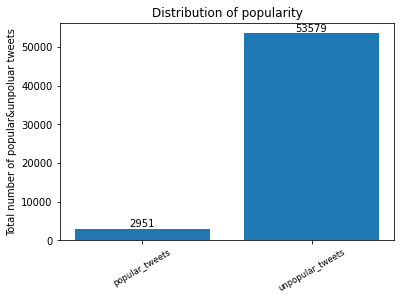

In [ ]:

#K-MEANSÂØπ‰∏ÄÁª¥Êï∞ÁªÑËÅöÁ±ªÔºöÊ†∏ÂøÉÁöÑÊìç‰ΩúÊòØy = x.reshape(-1,1)ÔºåÂê´‰πâ‰∏∫Â∞Ü‰∏ÄÁª¥Êï∞ÊçÆÂèòÊàêÂè™Êúâ1ÂàóÔºåË°åÊï∞‰∏çÁü•ÈÅìÂ§öÂ∞ëÔºà-1‰ª£Ë°®Ê†πÊçÆÂâ©‰∏ãÁöÑÁª¥Â∫¶ËÆ°ÁÆóÂá∫Êï∞ÁªÑÁöÑÂè¶Â§ñ‰∏Ä‰∏™shapeÂ±ûÊÄßÂÄºÔºâ

kmeans = KMeans(n_clusters=2)
kmeans.fit(pop_value_2d)
labels_kmeans = kmeans.labels_
print("kmeans‰∏≠unpopluarÁöÑ‰∏™Êï∞Ôºö", sum(labels_kmeans==0))#53579
centers = kmeans.cluster_centers_
print("‰∏§‰∏™‰∏≠ÂøÉÁÇπÊòØÔºö",centers)
ave_center = centers.mean()
print("ÈòàÂÄºÊòØÔºö",ave_center)
#ÊääÂ§ß‰∫éÈòàÂÄºÁöÑËÆæ‰∏∫1Ôºåpopular Â∞è‰∫éÁöÑËÆæ‰∏∫0Ôºåunpopular
data_exceptlarge.loc[data_exceptlarge.pop_value>=ave_center, 'pop_label'] = 1
data_exceptlarge.loc[data_exceptlarge.pop_value<ave_center, 'pop_label'] = 0

data_exceptlarge_index = data_exceptlarge.index.to_list()

# data_large = data[~data.index.isin(data_exceptlarge_index)]
data_large = data[(data['favorites']>=500) | (data['retweets']>=300)]
###########Â∞ÜdataÂêàÂπ∂ÔºåÂæóÂà∞pop_labelÁöÑÂÄº‰∏∫0Âíå1
data_large['pop_label']=1
data_labeled_KM = pd.concat([data_exceptlarge,data_large],ignore_index=True) 
print("ÂΩìÂâçÁî®Âà∞ÁöÑÊï∞ÊçÆÈõÜÁöÑshapeÔºö",data_labeled_KM.shape)

## distribution of popular and unpopular

popnum = data_labeled_KM[data_labeled_KM['pop_label']==1].shape[0]
unpopnum = data_labeled_KM[data_labeled_KM['pop_label']==0].shape[0]
print("popularÁöÑ‰∏™Êï∞Ôºö",data_labeled_KM[data_labeled_KM['pop_label']==1.0].count())
# print(len(data_labeled))
x = range(2)
y = np.array([popnum,unpopnum])

x_label = ["popular_tweets","unpopular_tweets"]
plt.xticks(x,x_label,size="small",rotation=30)

plt.ylabel("Total number of popular&unpoluar tweets")
for a,b in zip(x,y):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("Distribution of popularity")
plt.bar(x,y)
plt.show()#2951Âíå53579

### GMM for clsutering

Âõõ‰∏™ÂçèÊñπÂ∑ÆÁöÑlabels full [array([0, 0, 0, ..., 1, 0, 1])]
ÈòàÂÄºÊòØÔºö 33.036058693628945
ÂèóÊ¨¢ËøéÁöÑÔºå 7908


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

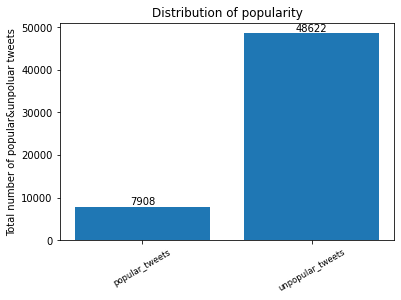

Âõõ‰∏™ÂçèÊñπÂ∑ÆÁöÑlabels diag [array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 1])]
ÈòàÂÄºÊòØÔºö 33.036058693628135
ÂèóÊ¨¢ËøéÁöÑÔºå 7908


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

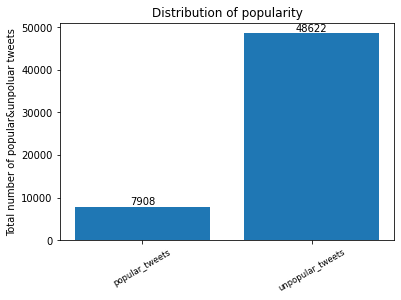

Âõõ‰∏™ÂçèÊñπÂ∑ÆÁöÑlabels spherical [array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 1])]
ÈòàÂÄºÊòØÔºö 33.036058693628135
ÂèóÊ¨¢ËøéÁöÑÔºå 7908


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

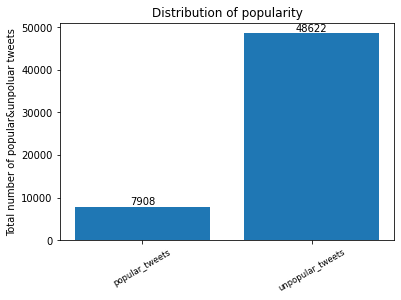

Âõõ‰∏™ÂçèÊñπÂ∑ÆÁöÑlabels tied [array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 0, 0])]
ÈòàÂÄºÊòØÔºö 121.08251499715193
ÂèóÊ¨¢ËøéÁöÑÔºå 2738


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

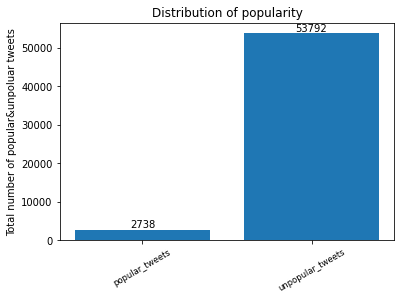

In [ ]:
from sklearn.mixture import GaussianMixture
covariance_t =['full','diag','spherical','tied']

labels_gmm = []#Áî®‰∫é‰øùÂ≠òÂõõ‰∏™covarianceÁöÑËÅöÁ±ªÁªìÊûú
for i in covariance_t:
  gmm = GaussianMixture(n_components=2,covariance_type=i,max_iter=20, random_state=0).fit(pop_value_2d)
  #pop 14776
  # gmm = GaussianMixture(n_components=2,covariance_type='diag',max_iter=20, random_state=0).fit(pop_value_2d)
  # gmm = GaussianMixture(n_components=2,covariance_type='spherical',max_iter=20, random_state=0).fit(pop_value_2d)
  labels = gmm.predict(pop_value_2d)
  labels_gmm.append(labels)
  print("Âõõ‰∏™ÂçèÊñπÂ∑ÆÁöÑlabels",i,labels_gmm)
  #ÊääÂ§ß‰∫éÈòàÂÄºÁöÑËÆæ‰∏∫1Ôºåpopular Â∞è‰∫éÁöÑËÆæ‰∏∫0Ôºåunpopular
  ave_center = gmm.means_.mean()
  print("ÈòàÂÄºÊòØÔºö",ave_center)
  #ÊääÂ§ß‰∫éÈòàÂÄºÁöÑËÆæ‰∏∫1Ôºåpopular Â∞è‰∫éÁöÑËÆæ‰∏∫0Ôºåunpopular
  data_exceptlarge.loc[data_exceptlarge.pop_value>=ave_center, 'pop_label'] = 1
  data_exceptlarge.loc[data_exceptlarge.pop_value<ave_center, 'pop_label'] = 0


  # data_exceptlarge['pop_label'] = labels_gmm
  data_exceptlarge_index = data_exceptlarge.index.to_list()

  # data_large = data[(data['favorites']>=500) | (data['retweets']>=300)]
  ###########Â∞ÜdataÂêàÂπ∂ÔºåÂæóÂà∞pop_labelÁöÑÂÄº‰∏∫0Âíå1
  data_large['pop_label']=1
  data_labeled_GMM = pd.concat([data_exceptlarge,data_large],ignore_index=True) 
  popnum = data_labeled_GMM[data_labeled_GMM['pop_label']==1].shape[0]
  unpopnum = data_labeled_GMM[data_labeled_GMM['pop_label']==0].shape[0]
  print("ÂèóÊ¨¢ËøéÁöÑÔºå",popnum)

  # print(len(data_labeled))
  x = range(2)
  y = np.array([popnum,unpopnum])

  x_label = ["popular_tweets","unpopular_tweets"]
  plt.xticks(x,x_label,size="small",rotation=30)


  plt.ylabel("Total number of popular&unpoluar tweets")
  for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
  plt.title("Distribution of popularity")
  plt.bar(x,y)
  plt.show()

## Evaluate the threshold

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

### Evaluate Kmeans

In [ ]:
#silhouette_score(ÊÄùË∑ØËâæÁâπ)
result_list = kmeans.fit_predict(pop_value_2d)
# print(len(result_list))
# plt.scatter(pop_value_2d[:, 0],y= np.full( shape=158429, fill_value=3, dtype=np.int),s=1,c=result_list)
score = silhouette_score(pop_value_2d, result_list)
score

0.9018295022381785

In [ ]:
#DBI davies_bouldin_score

labels_kmeans = kmeans.labels_
davies_bouldin_score(pop_value_2d, labels_kmeans)
# sum(labels==0)

0.4094627991180788

### Evaluate GMM

In [ ]:
# (ÊÄùË∑ØËâæÁâπ)

#labels_gmm
#È°∫Â∫è‰æùÊ¨°Ôºö['full','diag','spherical','tied']
for i in labels_gmm:
  score = silhouette_score(pop_value_2d, i)
  print(score)

0.6410564355662827
0.6410564355662827
0.6410564355662827
0.9059495725669343


In [ ]:
#DBI davies_bouldin_score
#È°∫Â∫è‰æùÊ¨°Ôºö[['full','diag','spherical','tied']
for i in labels_gmm:
  score = davies_bouldin_score(pop_value_2d, i)
  print(score)

0.8898912828977829
0.8898912828977829
0.8898912828977829
0.369355152884217


##distribution of popular tweets 
After comparingÔºå the most suitable threshold is from GMM with "tied".
The final labels are saved in dataframe '*data_labeled*'.

ÂèóÊ¨¢ËøéÁöÑÔºå 2738
ÊúÄÂ§ßÁöÑËΩ¨ÂèëÈáèÔºö 26164
retweet num is 0: 6


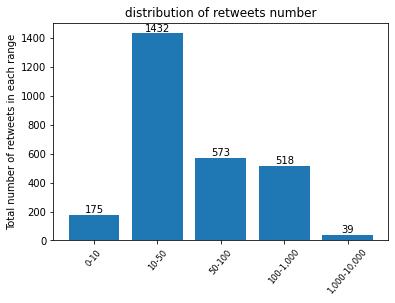

ÊúÄÂ§ßÁöÑÁÇπËµûÈáèÔºö 106130
favorites num is 0: 0


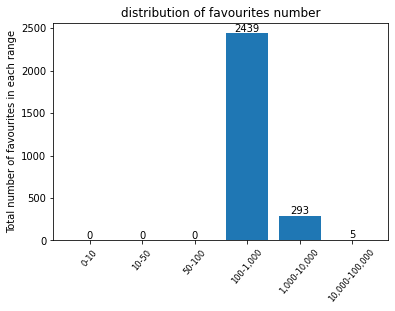

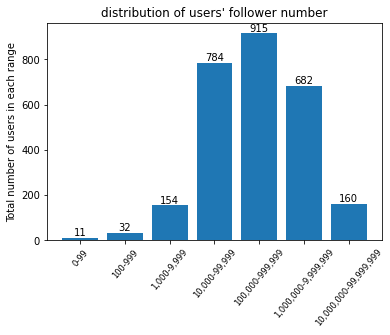

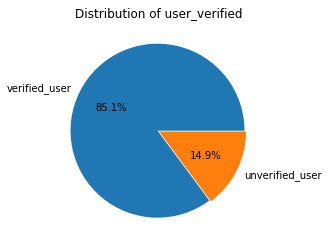

In [ ]:
print("ÂèóÊ¨¢ËøéÁöÑÔºå",popnum)
#1 rewteetsËΩ¨ÂèëÈáè
data_pop = data_labeled_GMM[data_labeled_GMM['pop_label']==1]
# print("popular tweets",data_pop.count())
retweetsnum_pop = data_pop['retweets'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
retweetsnum_pop = np.array(retweetsnum_pop)
print("ÊúÄÂ§ßÁöÑËΩ¨ÂèëÈáèÔºö",retweetsnum_pop.max())
print("retweet num is 0:",sum(retweetsnum_pop==0))
ret__pop_0_10 = ((0 <= retweetsnum_pop) & (retweetsnum_pop < 10)).sum()#0-10
ret_pop_10_50 =((10 <= retweetsnum_pop) & (retweetsnum_pop < 50)).sum() #10-50
ret_pop_50_100 = ((50 <= retweetsnum_pop) & (retweetsnum_pop < 100)).sum()#50-100 
ret_pop_100_1000 = ((100 <= retweetsnum_pop) & (retweetsnum_pop < 1000)).sum()#100-1000
ret_pop_1000_1w = ((1000 <= retweetsnum_pop) & (retweetsnum_pop < 10000)).sum()#1000-1w

x1 = range(5)
y1 = np.array([ret__pop_0_10, ret_pop_10_50, ret_pop_50_100, ret_pop_100_1000, ret_pop_1000_1w])
x_label = ["0-10","10-50","50-100","100-1,000","1,000-10,000"]
plt.xticks(x1,x_label,size="small",rotation=50)
plt.ylabel("Total number of retweets in each range")
for a,b in zip(x1,y1):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of retweets number")
# plt.subplot(421)
plt.bar(x1,y1)
plt.show()
##2 favoritesÁÇπËµûÈáè
likesnum = data_pop['favorites'].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
likesnum = np.array(likesnum)
print("ÊúÄÂ§ßÁöÑÁÇπËµûÈáèÔºö",likesnum.max())
print("favorites num is 0:",sum(likesnum==0))
like_0_10 = ((0 <= likesnum) & (likesnum < 10)).sum()#0-10
like_10_50 =((10 <= likesnum) & (likesnum < 50)).sum() #10-50
like_50_100 = ((50 <= likesnum) & (likesnum < 100)).sum()#50-100 41424
like_100_1000 = ((100 <= likesnum) & (likesnum < 1000)).sum()#100-1000 16967
like_1000_1w = ((1000 <= likesnum) & (likesnum < 10000)).sum()#1000-1w 7673
like_1w_10w = ((10000 <= likesnum) & (likesnum < 100000)).sum()#1000-1w 7673


x2 = range(6)
y2 = np.array([like_0_10, like_10_50, like_50_100, like_100_1000, like_1000_1w, like_1w_10w])

x_label_2 = ["0-10","10-50","50-100","100-1,000","1,000-10,000","10,000-100,000"]
plt.xticks(x2,x_label_2,size="small",rotation=50)


plt.ylabel("Total number of favourites in each range")
for a,b in zip(x2,y2):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of favourites number")
# plt.subplot(424)
plt.bar(x2,y2)
plt.show()

##3 Á≤â‰∏ùÊï∞
followersnum = data_pop["user_followers"]
followersnum = data_pop["user_followers"].astype(int)#ËΩ¨ÂåñÊàêÊï¥Êï∞ÔºåÂéüÊù•ÁöÑÊï∞ÊçÆÊúâfloatÊúâstringÊØîËæÉÊùÇ‰π±
followersnum = np.array(followersnum)
fol_less100 = sum(followersnum<=100)#Â∞è‰∫é100ÁöÑÊúâ3‰∏áÂ§ö

# print(sorted(followersnum,reverse=False))#ÊéíÂ∫è
# print(sum(followersnum==0))#ËÆ°ÁÆó‰∏Ä‰∏™ÂÄºÁöÑ‰∏™Êï∞
fol_0_100 = ((0 <= followersnum) & (followersnum < 100)).sum()#0-100---30707
fol_100_1000 =((100 <= followersnum) & (followersnum < 1000)).sum() #100-1000 58717
fol_1000_1w = ((1000 <= followersnum) & (followersnum < 10000)).sum()#1000-1w 41424
fol_1w_10w = ((10000 <= followersnum) & (followersnum < 100000)).sum()#1w-10w 16967
fol_10w_100w = ((100000 <= followersnum) & (followersnum < 1000000)).sum()#10w-100w 7673
fol_100w_1000w = ((1000000 <= followersnum) & (followersnum < 10000000)).sum()#100w-1000w 2586
fol_1000w_1y = ((10000000 <= followersnum) & (followersnum < 100000000)).sum()#1000w-1y 355

x3 = range(7)
y3 = np.array([fol_0_100, fol_100_1000, fol_1000_1w, fol_1w_10w, fol_10w_100w, fol_100w_1000w, fol_1000w_1y])
# print(y)
x_label_3 = ["0-99","100-999","1,000-9,999","10,000-99,999","100,000-999,999","1,000,000-9,999,999","10,000,000-99,999,999"]
plt.xticks(x3,x_label_3,size="small",rotation=50)


plt.ylabel("Total number of users in each range")
for a,b in zip(x3,y3):
  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.title("distribution of users' follower number")
# plt.subplot(425)
plt.bar(x3,y3)
plt.show()


##4 Áî®Êà∑ËÆ§ËØÅ
# distribution of user_verified
verified = data_pop["user_verified"]
verified_true = data_pop[data_pop["user_verified"]==True]
verified_false = data_pop[data_pop["user_verified"]==False]
verified_true_num = verified_true.shape[0]
verified_false_num = verified_false.shape[0]
# print(verified_true_num)
label = ["verified_user","unverified_user"]
explode=[0.01,0.01]#ËÆæÂÆöÂêÑÈ°πË∑ùÁ¶ªÂúÜÂøÉn‰∏™ÂçäÂæÑ
values = [verified_true_num,verified_false_num]
# plt.subplot(428)
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')
plt.title("Distribution of user_verified")

plt.show()

# NLP

### Process text
remove mention, hashtag, "\n"

In [ ]:
#remove URL ÁßªÈô§text‰∏≠ÁöÑURL
print(data_labeled_GMM["text"].values[19])

def process(x):
    x = re.sub("(http|https):\/\/([\w.]+\/?)\S*", "", x)
    return x

data_labeled_GMM["text"] = data_labeled_GMM["text"].apply(process)
# len(data["text"].values[0])
# print(data["text"].values[19])

It ' be an early rise tomorrow when the action üôå Here ' s a up on when @ & ; @ will ‚Ä¶ :// t . / IJHNXxqWR5


In [ ]:
#remove @#\n Âà†Èô§@#\n
text = pd.DataFrame(data_labeled_GMM['text'])
# print(data["text"].values[2555])
def process(x):
  x = re.sub("(ÂõûÂ§ç)?(//)?\s*@\S*?\s*(:| |$)"," ",x)#Âà†Èô§@ÂíåÂêéÈù¢ÁöÑÂêçÂ≠ó
  x = re.sub('[#&]',"",x)
  a = re.sub('\n',".",x) #Âà†Èô§\n
  return a

data_labeled_GMM["text"] = data_labeled_GMM["text"].apply(process)
data_labeled_GMM["text"]

0        The wait for a medal is over ! üëèü•à ' s medal ac...
1        : cash prize for who help win at Read ANI Stor...
2        Complete Schedule for ' s and Men ' s Hockey a...
3        cricket fraternity for the Silver medal at 202...
4        on the steel . He sticks his landing !  Tokyo2...
                               ...                        
56525    Does anyone know why ' t or even a sub ?   Tok...
56526    Best of luck for all the who r in  Olympics202...
56527     :  ( 49kg ) become the first   to win silver ...
56528    4 - 2 against and they are in the next round i...
56529    had an awful last leg there and could be out  ...
Name: text, Length: 56530, dtype: object

###Text information
Â∞ÜtextÁî®BERTËΩ¨ÂåñÊàêËØçÂêëÈáè

In [ ]:
# Add tokenization[CLS],[SEP]
all_text = data_labeled_GMM["text"]
text_list_add2 = []
for i in all_text:
  # print(i)
  marked_text = "[CLS] " + i + " [SEP]"
  text_list_add2.append(marked_text)
# print (text_list_add2[0])

In [ ]:
tensors_list=[]
for i in text_list_add2:
  tokenized_text = tokenizer.tokenize(i)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  #BERTÊé•ÂèóËøáÂè•Â≠êÂØπÁöÑËÆ≠ÁªÉÔºåÊúüÊúõ‰ΩøÁî®1Âíå0Êù•Âå∫ÂàÜËøô‰∏§‰∏™Âè•Â≠ê„ÄÇ
  segments_ids = [1] * len(tokenized_text)
  # print (len(segments_ids))
  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  tensors_list.append([tokens_tensor,segments_tensors])


In [ ]:
 # Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

##Sentence vectors by BERT(‰ªéËøôÈáåÂàÜÂºÄËøêË°å)

In [ ]:
# 1-1wÁöÑÊï∞ÊçÆÂæóÂà∞bertÔºàÊ≤°ÊúâÂà†Èô§Ë°®ÊÉÖÔºâ
#Êé•‰∏ãÊù•ÔºåËÆ©Êàë‰ª¨Ëé∑ÂèñÁΩëÁªúÁöÑÈöêËóèÁä∂ÊÄÅ„ÄÇ
# Torch.no_GradÂÖ≥Èó≠Ê¢ØÂ∫¶ËÆ°ÁÆóÔºåËäÇÁúÅÂÜÖÂ≠òÔºåÂπ∂Âä†Âø´ËÆ°ÁÆóÈÄüÂ∫¶ÔºàÊàë‰ª¨‰∏çÈúÄË¶ÅÊ¢ØÂ∫¶ÊàñÂèçÂêë‰º†Êí≠ÔºåÂõ†‰∏∫Êàë‰ª¨Âè™ÊòØÂêëÂâç‰º†Êí≠Ôºâ
tensors_list_part = tensors_list[0:10000]
sent_emb = []
with torch.no_grad():
  for i in tensors_list_part:
    outputs = model(i[0], i[1])

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]
    token_vecs = hidden_states[-2][0]
    # Calculate the average of all 22 token vectors.
    sentence_embedding = torch.mean(token_vecs, dim=0)
    # print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
    sent_emb.append(sentence_embedding)
sent_emb = pd.DataFrame(sent_emb)
s1 = sent_emb.to_csv("/content/drive/MyDrive/data/s1.csv")

In [ ]:
# 1w-2.5wÁöÑÊï∞ÊçÆÂæóÂà∞bert
#Êé•‰∏ãÊù•ÔºåËÆ©Êàë‰ª¨Ëé∑ÂèñÁΩëÁªúÁöÑÈöêËóèÁä∂ÊÄÅ„ÄÇ
# Torch.no_GradÂÖ≥Èó≠Ê¢ØÂ∫¶ËÆ°ÁÆóÔºåËäÇÁúÅÂÜÖÂ≠òÔºåÂπ∂Âä†Âø´ËÆ°ÁÆóÈÄüÂ∫¶ÔºàÊàë‰ª¨‰∏çÈúÄË¶ÅÊ¢ØÂ∫¶ÊàñÂèçÂêë‰º†Êí≠ÔºåÂõ†‰∏∫Êàë‰ª¨Âè™ÊòØÂêëÂâç‰º†Êí≠Ôºâ
tensors_list_part2 = tensors_list[10000:25000]
sent_emb2 = []
with torch.no_grad():
  for i in tensors_list_part2:
    outputs = model(i[0], i[1])

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]
    token_vecs = hidden_states[-2][0]
    # Calculate the average of all 22 token vectors.
    sentence_embedding = torch.mean(token_vecs, dim=0)
    # print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
    sent_emb2.append(sentence_embedding)
sent_emb2 = pd.DataFrame(sent_emb2)
s2 = sent_emb2.to_csv("/content/drive/MyDrive/data/s2.csv")

In [ ]:
# 2.5w-4wÁöÑÊï∞ÊçÆÂæóÂà∞bert

#Êé•‰∏ãÊù•ÔºåËÆ©Êàë‰ª¨Ëé∑ÂèñÁΩëÁªúÁöÑÈöêËóèÁä∂ÊÄÅ„ÄÇ
# Torch.no_GradÂÖ≥Èó≠Ê¢ØÂ∫¶ËÆ°ÁÆóÔºåËäÇÁúÅÂÜÖÂ≠òÔºåÂπ∂Âä†Âø´ËÆ°ÁÆóÈÄüÂ∫¶ÔºàÊàë‰ª¨‰∏çÈúÄË¶ÅÊ¢ØÂ∫¶ÊàñÂèçÂêë‰º†Êí≠ÔºåÂõ†‰∏∫Êàë‰ª¨Âè™ÊòØÂêëÂâç‰º†Êí≠Ôºâ
tensors_list_part3 = tensors_list[25000:40000]
sent_emb3 = []
with torch.no_grad():
  for i in tensors_list_part3:
    outputs = model(i[0], i[1])

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]
    token_vecs = hidden_states[-2][0]
    # Calculate the average of all 22 token vectors.
    sentence_embedding = torch.mean(token_vecs, dim=0)
    # print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
    sent_emb3.append(sentence_embedding)
sent_emb3 = pd.DataFrame(sent_emb3)
s3 = sent_emb3.to_csv("/content/drive/MyDrive/data/s3.csv")

In [ ]:
#Êé•‰∏ãÊù•ÔºåËÆ©Êàë‰ª¨Ëé∑ÂèñÁΩëÁªúÁöÑÈöêËóèÁä∂ÊÄÅ„ÄÇ
# Torch.no_GradÂÖ≥Èó≠Ê¢ØÂ∫¶ËÆ°ÁÆóÔºåËäÇÁúÅÂÜÖÂ≠òÔºåÂπ∂Âä†Âø´ËÆ°ÁÆóÈÄüÂ∫¶ÔºàÊàë‰ª¨‰∏çÈúÄË¶ÅÊ¢ØÂ∫¶ÊàñÂèçÂêë‰º†Êí≠ÔºåÂõ†‰∏∫Êàë‰ª¨Âè™ÊòØÂêëÂâç‰º†Êí≠Ôºâ
tensors_list_part4 = tensors_list[40000:]
sent_emb4 = []
with torch.no_grad():
  for i in tensors_list_part4:
    outputs = model(i[0], i[1])

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]
    token_vecs = hidden_states[-2][0]
    # Calculate the average of all 22 token vectors.
    sentence_embedding = torch.mean(token_vecs, dim=0)
    # print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
    sent_emb4.append(sentence_embedding)
sent_emb4 = pd.DataFrame(sent_emb4)
s4 = sent_emb4.to_csv("/content/drive/MyDrive/data/s4.csv")

### upload senetence vectors in csv‰∏ä‰º†ËØªÂèñÂõõ‰∏™Êñá‰ª∂csvÔºåËΩ¨Âåñ‰∏∫ÂêëÈáè
It is because to train the whole data needs large size of RAM, so I divide it into 4 parts and save them into csv files


In [7]:
##ÊäädataframeËΩ¨ÂåñÊàêtensor

s1 = pd.read_csv("/content/drive/MyDrive/data/s1.csv")
s1 = pd.DataFrame(s1)
s2 = pd.read_csv("/content/drive/MyDrive/data/s2.csv")
s2 = pd.DataFrame(s2)
s3 = pd.read_csv("/content/drive/MyDrive/data/s3.csv")
s3 = pd.DataFrame(s3)
s4 = pd.read_csv("/content/drive/MyDrive/data/s4.csv")
s4 = pd.DataFrame(s4)
sente_vec = s1.append([s2,s3,s4])
sente_vec

Unnamed: 0                0  ...              766              767
0               0  tensor(-0.0126)  ...  tensor(-0.2428)   tensor(0.2236)
1               1  tensor(-0.0607)  ...  tensor(-0.2609)   tensor(0.2813)
2               2  tensor(-0.0880)  ...  tensor(-0.0866)   tensor(0.0048)
3               3   tensor(0.2593)  ...  tensor(-0.2267)  tensor(-0.0660)
4               4   tensor(0.1295)  ...  tensor(-0.2812)  tensor(-0.2345)
...           ...              ...  ...              ...              ...
16525       16525   tensor(0.3472)  ...   tensor(0.4228)  tensor(-0.0429)
16526       16526  tensor(-0.4387)  ...   tensor(0.1218)  tensor(-0.0265)
16527       16527  tensor(-0.5701)  ...  tensor(-0.4145)   tensor(0.2302)
16528       16528  tensor(-1.1253)  ...   tensor(0.5082)  tensor(-0.1028)
16529       16529  tensor(-0.0519)  ...  tensor(-0.2666)  tensor(-0.3521)

[56530 rows x 769 columns]

In [8]:
import torch
def string2tensor(s):
  # s = s[6:]
  # s = s[1:-1]
  # s = s.split(',')
  # print(s)
  s = re.findall(r"[(](.*?)[)]", s)
  emb = []
  for i in s:
    emb.append(float(i))
  emb = torch.tensor(emb, dtype=torch.float32)
  return emb

svec = sente_vec.iloc[:,1:]
# print(svec.iloc[1])
print(len(svec))
sente_vec_bert = []
for i in range(len(svec)):
  row = svec.iloc[i]
  row = row.to_string()
  a = string2tensor(row)
  sente_vec_bert.append(a)


# for index, row in sente_vec.iterrows():
#   row = str(row)
#   a = string2tensor(row)
#   print(a)

56530


## Reduce DimentionÔºàÈôçÁª¥PCAÔºâ

In [10]:
#sente_vec_bert 768ÁöÑÂè•ÂêëÈáè
svec_bert_arr = np.array(sente_vec_bert[0])
# svec_bert_arr
for i in sente_vec_bert[1:]:
  sen_arr = np.array(i)#ÂÖ∂‰∏≠ÁöÑ‰∏Ä‰∏™tweetÁöÑÂêëÈáè
  # print(sen_arr)
  svec_bert_arr = np.append(svec_bert_arr,sen_arr)
svec_bert_arr.shape#43415040


(43415040,)

In [11]:
#################‰øÆÊîπÁâà
print(svec_bert_arr.shape)
svec_bert_arr = svec_bert_arr.reshape(56530,768)
##standard Ê†áÂáÜÂåñ
mean = svec_bert_arr.mean(axis=0)#axis=0ÊòØÂàó‰∏éÂàó‰πãÈó¥ËøõË°åÁöÑËøêÁÆó
deviation = svec_bert_arr.std(axis=0)#Ê†áÂáÜÂ∑Æ
standardized = (svec_bert_arr-mean)/deviation

##PCA
covMat = np.cov(standardized, rowvar=False)
# print(covMat)
featValue, featVec = np.linalg.eig(covMat) 
index = np.argsort(featValue)[::-1] #‰ªéÂ§ßÂà∞Â∞èÊéíÂàóÁâπÂæÅÂÄº

per_value_sum = 0
n_components =np.array([1,1,1,1,1,1,1,1,1,1])
for i in index:
    per_value_sum += featValue[i]
    if per_value_sum/np.sum(featValue) < 0.1:#1
        n_components[0] +=1
    if per_value_sum/np.sum(featValue) < 0.15:#2
        n_components[1] +=1 
    if per_value_sum/np.sum(featValue) < 0.2:#3
        n_components[2] +=1
    if per_value_sum/np.sum(featValue) < 0.26:#4
        n_components[3] +=1
    if per_value_sum/np.sum(featValue) < 0.3:#5
        n_components[4] +=1
    if per_value_sum/np.sum(featValue) < 0.33:#6
        n_components[5] +=1
    if per_value_sum/np.sum(featValue) < 0.36:#7
        n_components[6] +=1
    if per_value_sum/np.sum(featValue) < 0.38:#8
        n_components[7] +=1
    if per_value_sum/np.sum(featValue) < 0.4:#9
        n_components[8] +=1
    if per_value_sum/np.sum(featValue) < 0.42:#10
        n_components[9] +=1
print(n_components)

#ÊäïÂΩ±Êò†Â∞Ñ
text_lowd_all = []
vector_ordered = featVec[:,index] #ÊäävectorÊåâ‰ªéÂ§ßÂà∞Â∞èÊéíÂàó
for i in n_components:
  projected = vector_ordered[:,:i]#ÊéíÂàóÂ•Ω‰πãÂêéÂèñÂâçn_components‰∏™
  data_lowd = np.dot(standardized,projected)#ÂèñÂ•ΩÁöÑÂêëÈáè‰∏éÊ†áÂáÜÂåñÂêéÁöÑÂéüÊï∞ÊçÆÁÇπ‰πòÂæóÂà∞ÈôçÁª¥ÁöÑÊï∞ÊçÆ
  text_lowd_all.append(data_lowd)
# data_lowd_all
# print("-----------data_lowd-----------")
# print(text_lowd_all.shape)

(43415040,)
[ 1  2  3  4  5  6  7  8  9 10]


# sentiment analysis

In [ ]:
def sentiment_analysis(text_ls):
    analyzer = create_analyzer(task="sentiment", lang="en") #Define anlayzer
    text_ls = []
    for sent in tqdm(text_list_split):
      tmp = analyzer.predict(sent)
      probas = [] #Store all the probablities
      for p in tmp.probas:
          probas.append(tmp.probas[p])
      text_ls.append([tmp.output]+probas)
    text_ls = pd.DataFrame(text_ls,columns = ['output','NEU','POS','NEG'])
    return text_ls

## calculate polarity probability of each tweet

In [ ]:
text_list = data_labeled_GMM["text"].tolist()
# part = text_list[0:50]
# print(len(part))
# analyzer = SentimentAnalyzer(lang="en") #Define anlayzer
analyzer = create_analyzer(task="sentiment", lang="en")
text_ls = []

for i in tqdm(text_list):
    tmp = analyzer.predict(i)
    # print(tmp)
    probas = [] #Store all the probablities
    for p in tmp.probas:
      probas.append(tmp.probas[p])
    text_ls.append([tmp.output]+probas)

text_ls = pd.DataFrame(text_ls,columns = ['output','NEG','NEU','POS'])
display(text_ls)   

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/56530 [00:00<?, ?it/s]

output       NEG       NEU       POS
0        NEU  0.004847  0.751594  0.243559
1        NEU  0.001428  0.804948  0.193624
2        NEU  0.001792  0.895586  0.102622
3        POS  0.001298  0.402061  0.596641
4        NEU  0.001824  0.895698  0.102477
...      ...       ...       ...       ...
56525    NEU  0.017014  0.975283  0.007704
56526    POS  0.000883  0.009521  0.989596
56527    NEU  0.010091  0.911002  0.078907
56528    NEU  0.001904  0.963706  0.034390
56529    NEG  0.958419  0.038666  0.002915

[56530 rows x 4 columns]

In [ ]:
# ‰øùÂ≠òÊÉÖÊÑüÊûÅÊÄßÁªìÊûúÂà∞csvÂíådata_labeled
data_labeled_GMM['polarity'] = text_ls['output']
data_labeled_GMM

f = data_labeled_GMM.to_csv("/content/drive/MyDrive/data/sentiment.csv")
# f1 = data_labeled_GMM.to_html("sentiment.html")

In [ ]:
data_labeled_GMM[data_labeled_GMM['polarity']=='POS'].count()

id                21889
user_name         21889
user_followers    21889
user_verified     21889
date              21889
text              21889
retweets          21889
favorites         21889
is_retweet        21889
pop_value         21607
pop_label         21889
polarity          21889
dtype: int64

In [12]:
all_data = pd.read_csv("/content/drive/MyDrive/data/sentiment.csv", sep=',',encoding='UTF-8')
all_data

Unnamed: 0                   id  ... pop_label  polarity
0               0  1418889351405125634  ...       0.0       NEU
1               1  1418889308337967104  ...       0.0       NEU
2               2  1418889136560353282  ...       0.0       NEU
3               3  1418889120781193216  ...       0.0       POS
4               4  1418889102259273730  ...       0.0       NEU
...           ...                  ...  ...       ...       ...
56525       56525  1452587417827823621  ...       1.0       NEU
56526       56526  1452580364459728898  ...       1.0       POS
56527       56527  1452567101319823361  ...       1.0       NEU
56528       56528  1452541913886756867  ...       1.0       NEU
56529       56529  1452523053485789187  ...       1.0       NEG

[56530 rows x 13 columns]

# Predict Popularity

## Extract features 

In [13]:
#ÊääÁâπÂæÅ‰∏≠ÁöÑstringÂèòÊàêdigits
all_data['user_verified'] =all_data[['user_verified']].astype('int')
mapping1 = {'POS':1, 'NEU':0, 'NEG':-1}
all_data['polarity'] = all_data['polarity'].map(mapping1)


In [14]:
###### Â∞ÜcontentÈÄêÊ∏êÂä†ÂÖ•feature_list ÁîüÊàêÊñ∞ÁâπÂæÅ

print("popularÁöÑ‰∏™Êï∞:")#2738
print(len(all_data[all_data['pop_label']==1]))#label=1 popular

feature_list=[]
for i in range(len(text_lowd_all)):
  features = all_data[['user_followers','user_verified','polarity']]
  # print(i)
  for j in range(text_lowd_all[i].shape[1]):
    features["emb_{}".format(j)] = text_lowd_all[i][:,j]
  # print("features!!!")
  feature_list.append(features)
# f = features.to_html("features.html")

popularÁöÑ‰∏™Êï∞:
2738


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
#standardize features ÂØπÁâπÂæÅËøõË°åÊ†áÂáÜÂåñÔºàÊåâÂàóÔºâ
def standardize(X):  
    m, n = X.shape  
    # ÂΩí‰∏ÄÂåñÊØè‰∏Ä‰∏™ÁâπÂæÅ  
    for j in range(n):  
        features = X[:,j]  
        meanVal = features.mean(axis=0)  
        std = features.std(axis=0)  
        if std != 0:  
            X[:, j] = (features-meanVal)/std  
        else:  
            X[:, j] = 0  
    return X  

## Divide dataset to train set and test set

In [16]:
#Âè™ÂàÜÂâ≤ ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ ‰∏ÄÊ¨°ÁöÑ‰ª£Á†Å
# from sklearn.model_selection import train_test_split
# features_arr = np.array(features)
# x, y = np.split(features_arr, (6,), axis=1)#Ââç3ÂàóÊàê‰∏∫ÁâπÂæÅÔºåÂêé‰∏ÄÂàóÊòØÊ†áÁ≠æ
# # x = x[:, :2]
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8)
# #ÊÇ®ÂèØ‰ª•‰ΩøÁî®sklearn.model_selection.train_test_split‰∏§Ê¨°„ÄÇÈ¶ñÂÖàÊãÜÂàÜËÆ≠ÁªÉÔºåÊµãËØïÔºåÁÑ∂ÂêéÂÜçÂ∞ÜËÆ≠ÁªÉÊãÜÂàÜ‰∏∫È™åËØÅÂíåËÆ≠ÁªÉ„ÄÇ

In [16]:
from sklearn.model_selection import KFold,StratifiedKFold
y = all_data['pop_label'] #label
# for i in feature_list:
#   x = np.array(i)
#   # print(x)
#   y = all_data['pop_label']
sfolder = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
sfolder

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

## Functions used in ML models

In [17]:
#Ê∑ªÂä†sample_weight
def sample_weight_fun(x_train,y_train,pop_weight,unpop_weight): 
  sample_weight = np.ones(len(x_train))
  comb_xy = np.column_stack((sample_weight,y_train))
  pop = np.where(comb_xy[:,-1]==1)
  unpop = np.where(comb_xy[:,-1]==0)
  sample_weight[pop] *= pop_weight
  sample_weight[unpop] *= unpop_weight
  return sample_weight

In [18]:
def evaluation_metrics(model,x_train,y_train,x_test,y_test,y_predict):
    np.set_printoptions(suppress=True)
    con_mx = conf_matrix(y_test, y_predict)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    f1_macro = f1_score(y_test,y_predict, average='macro')
    f1_micro = f1_score(y_test,y_predict, average='micro')
    recall = recall_score(y_test, y_predict,average=None)
    precision =precision_score(y_test, y_predict,average=None)
    eval_score = np.array([train_acc,test_acc,con_mx[0],con_mx[1],con_mx[2],con_mx[3],f1_macro,f1_micro,recall[0],recall[1],precision[0],precision[1]])
    return eval_score

In [19]:
#confusion matrix
def conf_matrix(y,pred): 
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred) 
    ((tnr,fpr),(fnr,tpr) )= metrics.confusion_matrix(y, pred, normalize='true') 
    confusion_mx = pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
               f'FP = {fp} ( FPR = {fpr:1.2%})'], 
              [f'FN = {fn} (FNR = {fnr:1.2%})', 
               f'TP = {tp} (TPR = {tpr:1.2%})' ]], 
            index=['True 0(unpopular)', 'True 1(popular)'], 
            columns=['Pred 0(Approve as unpopular)', 
                            'Pred 1(Approve as popular)']) 
    return tp,fn,fp,tn,confusion_mx

In [20]:
def minimum_thresh(y_test,y_predict):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
    # print(thresholds)
    dfplot=pd.DataFrame({'Threshold':thresholds, 
            'False Positive Rate':fpr, 
            'False Negative Rate': 1-tpr})
    dfplot['sum_fpr_fnr'] = dfplot['False Negative Rate'] + dfplot['False Positive Rate']
    min_thresh = dfplot['Threshold'][dfplot['sum_fpr_fnr']==dfplot['sum_fpr_fnr'].min()].values[0]
    # print("min_thresh",min_thresh)
    ## ÁîªÂõæ
    # ax=dfplot.plot(x='Threshold', y=['False Positive Rate','False Negative Rate'], figsize=(10,6))
    # # ax.plot([0.00035,0.00035],[0,0.1]) #mark example thresh.
    # ax.set_xbound(0,0.8); 
    # ax.set_ybound(0,0.3) #zoom in
    return min_thresh

# SVM

In [21]:
# svm ÂáΩÊï∞
def SVM_SVC(features):
  count = 0
  x = np.array(features)#ÁâπÂæÅÂÄº
  x = standardize(x)#ÂØπÁâπÂæÅÂÄºÊåâÂàóËøõË°åÊ†áÂáÜÂåñ
  y = np.array(all_data['pop_label']) #label
  eval_score_all = []
  for train_index,test_index in sfolder.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    count +=1
    clf = svm.SVC(C=0.5, 
            kernel='rbf', 
            gamma=20, 
            decision_function_shape='ovr',
            class_weight={0: 1, 1: 10})
    clf.fit(x_train, y_train.ravel())
    y_test = y_test.astype(int)
    y_predict = clf.predict(x_test)
    y_predict = y_predict.astype(int)
    eval_score = evaluation_metrics(clf,x_train,y_train,x_test,y_test,y_predict)
    eval_score_all.append(eval_score)
  # print(eval_score_all)
  return eval_score_all


In [24]:
#add content feature 1-10
count =3
for i in feature_list:
  eval_score_all = np.array(SVM_SVC(i))
  count+=1
  print("%d feature" % count)
  eval_all_ave = np.average(eval_score_all,axis=0)
  result = np.around(eval_all_ave, decimals=4)
  print(result)
# GBDT_classfier(feature_list[0])

#GBDT

In [25]:
def GBDT_classfier(features):
  count = 0  
  x = np.array(features)
  x = standardize(x)
  # print(x)
  y = np.array(all_data['pop_label'])
  eval_score_all = [] #Â≠òÂÇ®5Ê¨°ÁöÑËØÑ‰º∞ÂàÜÊï∞
  for train_index,test_index in sfolder.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 50 30 25 20 17.5 15 12.5 10 7.5 5
    sample_weight = sample_weight_fun(x_train,y_train,12.5,1)#Ê∑ªÂä†sample_weight
    count +=1
    gbc=HistGradientBoostingClassifier(learning_rate =0.01, 
            max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
            n_iter_no_change=15, random_state=42).fit(x_train,y_train,sample_weight=sample_weight)
    y_test = y_test.astype(int)
    y_predict = gbc.predict(x_test)#Á°¨ÂàÜÁ±ª
    eval_score = evaluation_metrics(gbc,x_train,y_train,x_test,y_test,y_predict)
   
     # eval_score = evaluation_metrics(gbc,x_train,y_train,x_test,y_test,y_predict)
    eval_score_all.append(eval_score)
  # print(eval_score_all)
  return eval_score_all

In [27]:
#add content feature 1-10
count =3
for i in feature_list[2:3]:
  eval_score_all = np.array(GBDT_classfier(i))
  count+=1
  print("%d features" % count)
  eval_all_ave = np.average(eval_score_all,axis=0)
  result = np.around(eval_all_ave, decimals=4)
  print(result)
# GBDT_classfier(feature_list[0])

4 features
[   0.7838    0.7828  450.8      96.8    2358.8    8399.6       0.5706
    0.7828    0.7807    0.8232    0.9886    0.1607]


# Logstic model

In [32]:
def LR_CV(features):
  x = np.array(features)
  x = standardize(x)
  y = np.array(all_data['pop_label'])
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8)
  sample_weight = sample_weight_fun(x_train,y_train,11.75,1)
  LRcv = linear_model.LogisticRegressionCV(solver="liblinear", 
                  cv=10).fit(x_train, y_train.ravel(),sample_weight=sample_weight)#ravel()ÊääÊï∞ÁªÑÂèòÊàê‰∏ÄÁª¥Êï∞ÁªÑ
  y_test = y_test.astype(int)
  y_predict = LRcv.predict(x_test)
  # print(hardpredtst_tuned_thresh)
  con_mx = conf_matrix(y_test, y_predict)
  # eval_score = [train_acc,test_acc,tp,fn,fp,tn,f1_macro,f1_micro,recall,precision]
  eval_score = evaluation_metrics(LRcv,x_train,y_train,x_test,y_test,y_predict)
  # print(eval_score)
  return eval_score

In [33]:
#add content feature 1-10
count =3
for i in feature_list:
  eval_score_all = np.array(LR_CV(i))
  count+=1
  print("%d features" % count)
  result = np.around(eval_score_all, decimals=4)
  print(result)


4 features
[   0.7099    0.7108  443.      115.     3155.     7593.        0.518
    0.7108    0.7065    0.7939    0.9851    0.1231]
5 features
[   0.7343    0.7332  430.      128.     2888.     7860.        0.5305
    0.7332    0.7313    0.7706    0.984     0.1296]
6 features
[   0.7343    0.7326  430.      128.     2895.     7853.        0.53
    0.7326    0.7306    0.7706    0.984     0.1293]
7 features
[   0.7341    0.7325  428.      130.     2894.     7854.        0.5296
    0.7325    0.7307    0.767     0.9837    0.1288]
8 features
[   0.7363    0.7344  424.      134.     2869.     7879.        0.5301
    0.7344    0.7331    0.7599    0.9833    0.1288]
9 features
[   0.7406    0.7412  413.      145.     2781.     7967.        0.5325
    0.7412    0.7413    0.7401    0.9821    0.1293]
10 features
[   0.7406    0.7411  413.      145.     2782.     7966.        0.5324
    0.7411    0.7412    0.7401    0.9821    0.1293]
11 features
[   0.7461    0.7467  412.      146.     2718.     8

# Imbalanced data

In [28]:
def GBDT_adjustthreshold(features):
  count = 0  
  x = np.array(features)
  x = standardize(x)
  # print(x)
  y = np.array(all_data['pop_label'])
  eval_score_all = [] #Â≠òÂÇ®5Ê¨°ÁöÑËØÑ‰º∞ÂàÜÊï∞
  thresh_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in thresh_list:
    for train_index,test_index in sfolder.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      sample_weight = sample_weight_fun(x_train,y_train,12.5,1)#Ê∑ªÂä†sample_weight
      count +=1
      gbc=HistGradientBoostingClassifier(learning_rate =0.01, 
              max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
              n_iter_no_change=15, random_state=42).fit(x_train,y_train,sample_weight=sample_weight)
      y_test = y_test.astype(int)
      predict_prob = gbc.predict_proba(x_test)
      # print(predict_prob)#ÊòØ‰∏Ä‰∏™Êï∞ÁªÑÔºå‰∏§‰∏™Êï∞ÔºåÂàÜÂà´ÊòØÔºå0ÁöÑÊ¶ÇÁéáÂíå1ÁöÑÊ¶ÇÁéá
      y_predict_pop = predict_prob[:,1]
      y_predict_unpop = predict_prob[:,0]
      # min_thresh = minimum_thresh(y_test,predict_prob[:,1])#Ë∞ÉÊï¥ÈòàÂÄº
      
      y_predict = np.full((len(predict_prob),),-1,"int")
      pop_1 = np.where(np.logical_and(y_predict_pop >= i, y_predict_unpop < i)) 
      unpop_0 = np.where(np.logical_and(y_predict_pop <= i, y_predict_unpop > i))
      y_predict[pop_1] = 1
      y_predict[unpop_0] = 0
      # print("###########################################")
      # print("ÊÄªÊï∞Ôºå-1,0Ôºå1")
      # print(len(y_predict),sum(y_predict==-1), sum(y_predict==0),sum(y_predict==1))
      pred_all = np.c_[x_test,y_test,y_predict]
      pred_cut = pred_all[~(pred_all[:,-1]==-1)]
      x_test_cut = pred_cut[:,0:-2]
      y_test_cut = pred_cut[:,-2]
      y_pred_cut = pred_cut[:,-1]
      eval_score = evaluation_metrics(gbc,x_train,y_train,x_test_cut,y_test_cut,y_pred_cut)
      eval_score_all.append(eval_score)
    np.set_printoptions(suppress=True)#ÂèñÊ∂àÁßëÂ≠¶ËÆ°Êï∞Ê≥ï
    eval_all_ave = np.average(eval_score_all,axis=0)# ÊØè‰∏™ÈòàÂÄºÈÉΩÊúâ5ÊäòÔºåÁÆóÂπ≥Âùá
    print(eval_all_ave)

In [30]:
# 6 features GBDTÔºå12.5:1
for i in feature_list[2:3]:
  eval_score_all = np.array(GBDT_adjustthreshold(i))
  # print(eval_score_all)
  # result = np.around(eval_score_all, decimals=4)
  print(eval_score_all)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[   0.78375199    0.99466941   10.6          18.4           9.6
 5104.8           0.60679702    0.99466941    0.99819752    0.22807018
    0.99644203    0.21011765]
[   0.78375199    0.9856353    55.5          30.5          65.4
 5928.1           0.68809048    0.9856353     0.99025689    0.46525464
    0.99508309    0.33195484]
[   0.78375199    0.95613097  131.33333333   41.46666667  326.13333333
 6505.4           0.67987523    0.95613097    0.96029874    0.58224136
    0.99398709    0.3047212 ]
[   0.78375199    0.93708283  176.55         51.          511.1
 6895.65          0.67084667    0.93708283    0.9410974     0.63585032
    0.99304799    0.28540781]
[   0.78375199    0.90622739  231.4          60.16        880.64
 7196.44          0.65080119    0.90622739    0.90902755    0.6733271
    0.99216226    0.26046771]
[   0.78375199    0.90184589  244.86666667   63.4         911.53333333
 7341.43333333    0.64962782    0.90184589    0.90477185    0.69388544
    0.99184033    0.254967

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[   0.78375199    0.91994092  207.02222222   56.08888889  716.4
 7062.75555556    0.65971029    0.91994092    0.92328082    0.65667075
    0.99255592    0.2715522 ]
None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def GBDT_minimal(features):
  count = 0  
  x = np.array(features)
  x = standardize(x)
  # print(x)
  y = np.array(all_data['pop_label'])
  eval_score_all = [] #Â≠òÂÇ®5Ê¨°ÁöÑËØÑ‰º∞ÂàÜÊï∞
  sum = 0
  for train_index,test_index in sfolder.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sample_weight = sample_weight_fun(x_train,y_train,12.5,1)#Ê∑ªÂä†sample_weight
    count +=1
    gbc=HistGradientBoostingClassifier(learning_rate =0.01, 
            max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
            n_iter_no_change=15, random_state=42).fit(x_train,y_train,sample_weight=sample_weight)
    y_test = y_test.astype(int)
    predict_prob = gbc.predict_proba(x_test)
    # print(predict_prob)#ÊòØ‰∏Ä‰∏™Êï∞ÁªÑÔºå‰∏§‰∏™Êï∞ÔºåÂàÜÂà´ÊòØÔºå0ÁöÑÊ¶ÇÁéáÂíå1ÁöÑÊ¶ÇÁéá
    y_predict_pop = predict_prob[:,1]
    y_predict_unpop = predict_prob[:,0]
    min_thresh = minimum_thresh(y_test,y_predict_pop)#Ë∞ÉÊï¥ÈòàÂÄº
    sum = sum + min_thresh
    # thresh_list = np.array([0.1,0.2,0.3,0.4,0.5])
    # thresh_list = np.clip(thresh_list,0,1)#ÊääarrayÁöÑÂÄºË∞ÉÊï¥Âà∞0-1‰πãÈó¥
    y_predict = np.where(y_predict_pop >= min_thresh, 1, 0) 
    eval_score = evaluation_metrics(gbc,x_train,y_train,x_test,y_test,y_predict)
  mini_thresh = sum/5
  eval_score_all.append(eval_score)
  print(mini_thresh)
  return eval_score_all

In [ ]:
#add content feature 1-10
count =0
for i in feature_list[2:3]:
  eval_score_all = np.array(GBDT_minimal(i))
  count+=1
  print("Add %d feature" % count)
  eval_all_ave = np.average(eval_score_all,axis=0)
  result = np.around(eval_all_ave, decimals=4)
  print(result)

min_thresh 0.37171670107786875
min_thresh 0.4667510607694565
min_thresh 0.31549903306285526
min_thresh 0.5181521539907689
min_thresh 0.49333200000022026
0.433090189780234
Add 1 feature
[   0.7753    0.7722  462.       86.     2502.     8256.        0.5638
    0.7711    0.7674    0.8431    0.9897    0.1559]
